In [1]:
from agents import ConsumerProducer, Influencer, ImperfectConsumerProducer
from content_market import ContentMarket
import numpy as np
from stats import TestStats

In [2]:
num_influencers = 1
num_consumer_producers = 20

production_rate = 1
external_production_rate = 1

topics = [[-1, 1]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics, production_rate, external_production_rate)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
agent_colors = dict()

for i in range(num_consumer_producers):
    cons_func = lambda x: inverse_decay(x, 1, 2)
    prod_func = lambda x: inverse_decay(x, 1, 2)
    #consumer_producer = ConsumerProducer(prod_func, cons_func, 20, 3, 1, init_following_rates_method='equal')
    consumer_producer = ImperfectConsumerProducer(prod_func, cons_func, 10, 3, 1, init_following_rates_method='equal')
    content_market.add_agent(consumer_producer)

    color = np.random.rand(3,)
    agent_colors[consumer_producer.index] = color

for i in range(num_influencers):
    influencer = Influencer(20, 1, init_following_rates_method='equal')
    content_market.add_agent(influencer)

    color = np.random.rand(3,)
    agent_colors[influencer.index] = color

In [6]:
import matplotlib.pyplot as plt
import visualize

In [7]:
content_market.finalize(method='even')

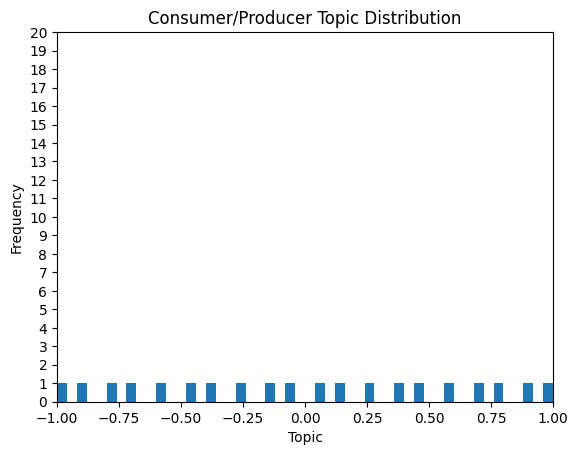

In [8]:
visualize.plot_topic_distribution_histogram("Consumer/Producer Topic Distribution", content_market.consumers, -1, 1)

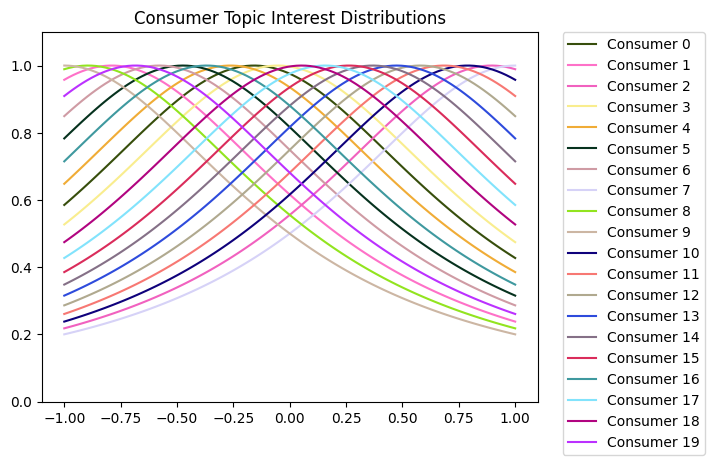

In [9]:
visualize.plot_consumer_topic_interest_distributions("Consumer Topic Interest Distributions", content_market.consumers, -1, 1, agent_colors)

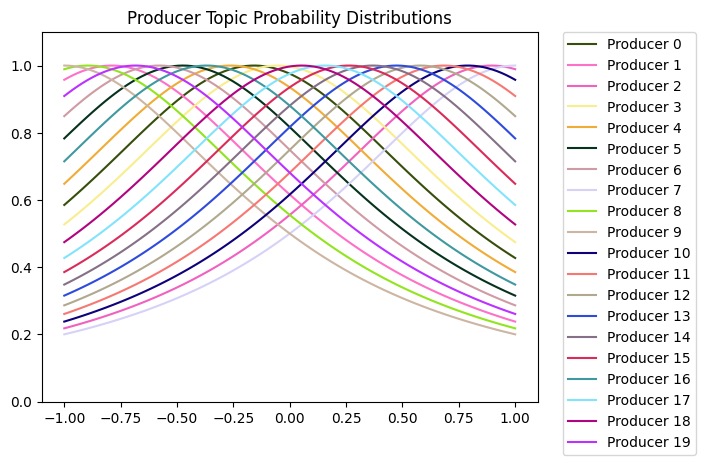

In [10]:
visualize.plot_producer_topic_probability_distributions("Producer Topic Probability Distributions", content_market.producers, -1, 1, agent_colors)

In [11]:
stats: TestStats = content_market.optimize(100)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing consumer 12
Optimizing consumer 13
Optimizing consumer 14
Optimizing consumer 15
Optimizing consumer 16
Optimizing consumer 17
Optimizing consumer 18
Optimizing consumer 19
Optimizing influencer 20
Optimizing producer 0
Optimization failed: ABNORMAL_TERMINATION_IN_LNSRCH Retrying...
Optimization succeeded (overall 64.73887795899645s) using 1 iterations and 58 function evaluations.
Optimizing producer 1
Optimization failed: ABNORMAL_TERMINATION_IN_LNSRCH Retrying...
Optimization succeeded (overall 120.77748216598411s) using 2 iterations and 134 function evaluations.
Optimizing producer 2
Optimization succeeded (overall 119.31814158300404s) using 11 iterations and 202 function evaluations.
Optimizing producer 3
Opti

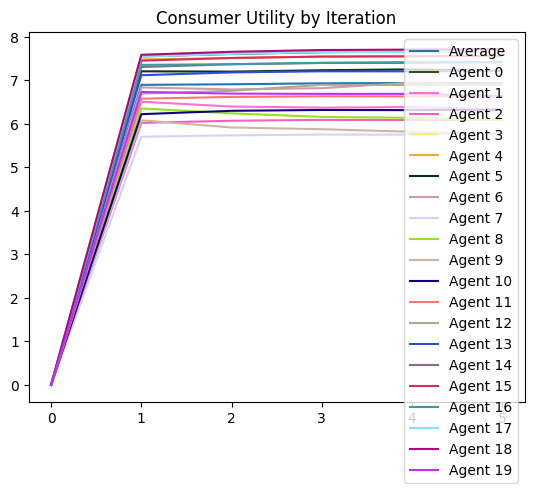

In [12]:
visualize.plot_agent_utility_by_iteration("Consumer Utility by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility)

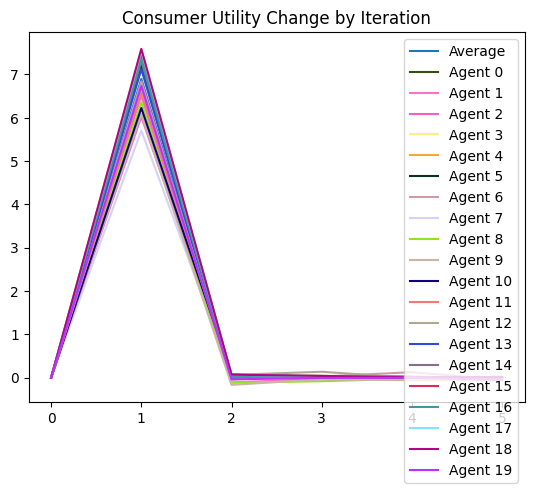

In [13]:
visualize.plot_agent_utility_change_by_iteration("Consumer Utility Change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility_change)

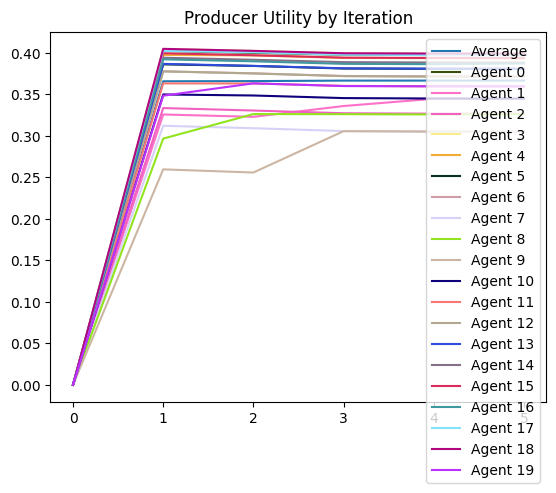

In [14]:
visualize.plot_agent_utility_by_iteration("Producer Utility by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility)

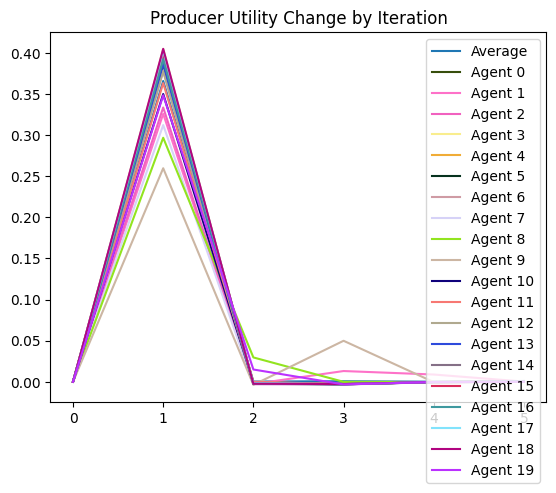

In [15]:
visualize.plot_agent_utility_change_by_iteration("Producer Utility Change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility_change)

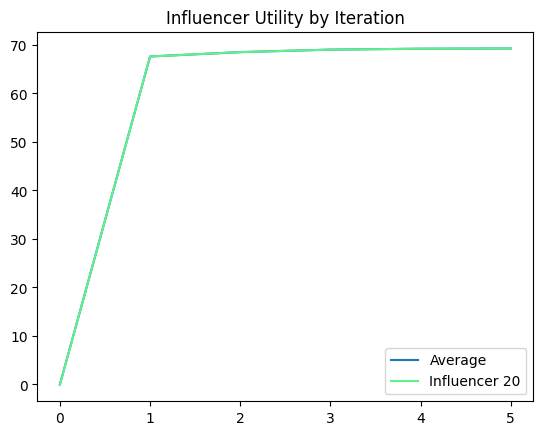

In [16]:
visualize.plot_agent_utility_by_iteration("Influencer Utility by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_utility)

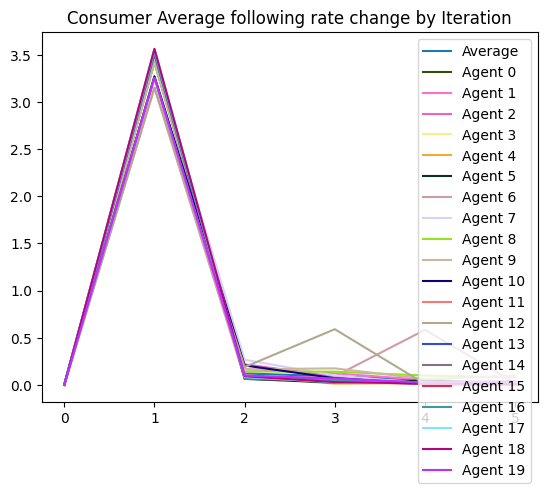

In [17]:
visualize.plot_following_rate_change_by_iteration("Consumer Average following rate change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_rate_change)

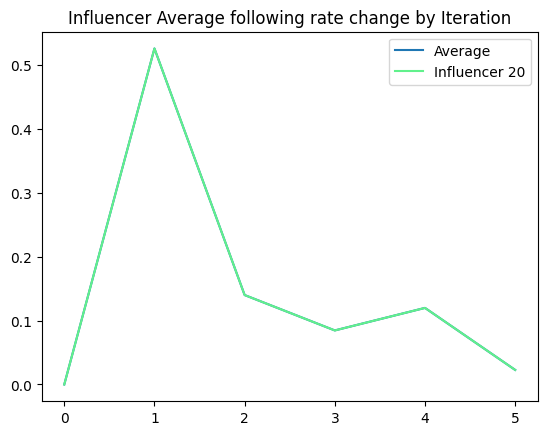

In [18]:
visualize.plot_following_rate_change_by_iteration("Influencer Average following rate change by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_rate_change)

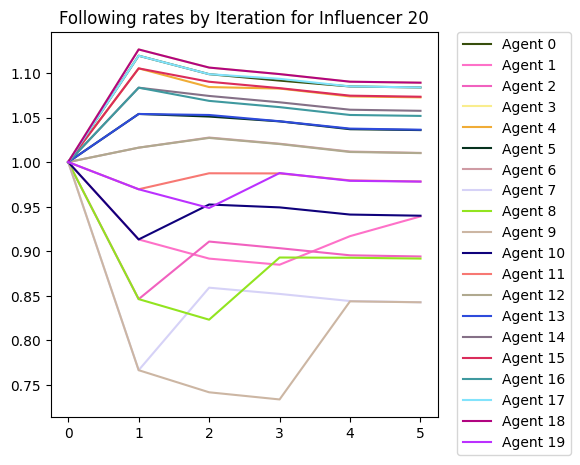

In [19]:
visualize.plot_following_rates_by_iteration(content_market.influencers, content_market.producers, agent_colors, stats.influencer_stats)

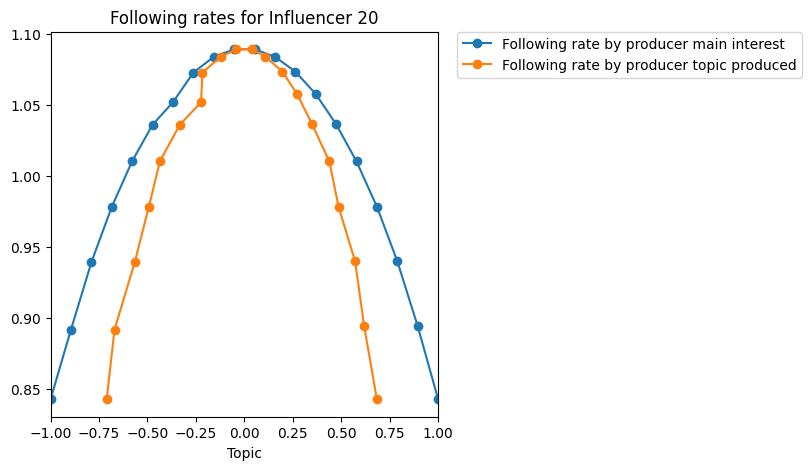

In [159]:
visualize.plot_agent_following_rates(content_market.influencers, stats.influencer_stats, agent_colors)

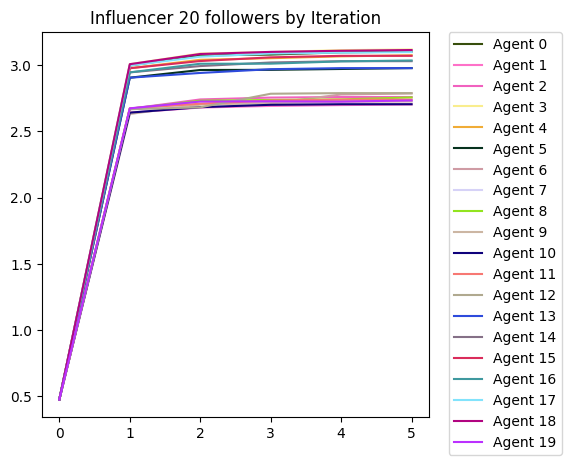

In [20]:
visualize.plot_follows_by_iteration(content_market.influencers, content_market.consumers, agent_colors, stats.consumer_stats)

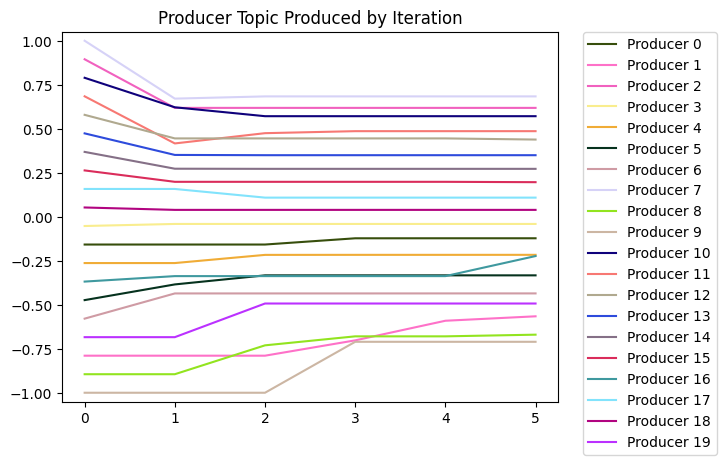

In [212]:
visualize.plot_producer_topic_produced_by_iteration("Producer Topic Produced by Iteration", content_market.producers, content_market.consumers, agent_colors, stats.producer_stats, False)

AttributeError: 'TestStats' object has no attribute 'producer_topic_standard_deviation'

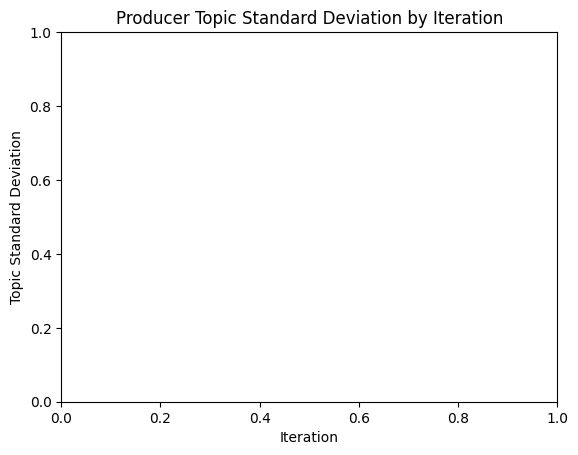

In [214]:
visualize.plot_value_by_iteration("Producer Topic Standard Deviation by Iteration", stats, "producer_topic_standard_deviation", "Topic Standard Deviation")

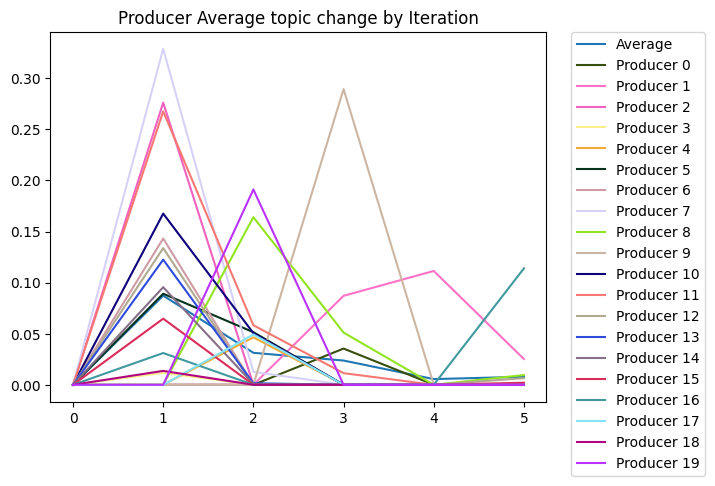

In [22]:
visualize.plot_producer_topic_change_by_iteration("Producer Average topic change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_change)

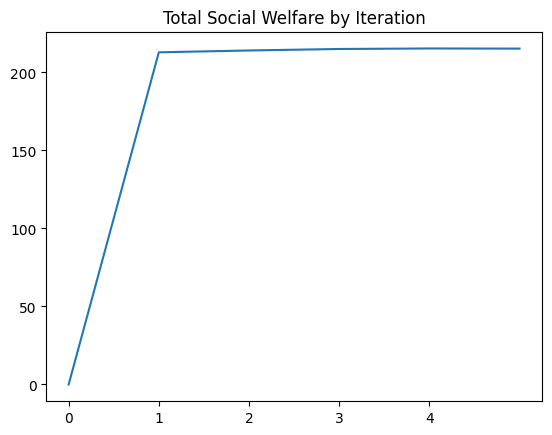

In [49]:
visualize.plot_total_social_welfare_by_iteration("Total Social Welfare by Iteration", stats)

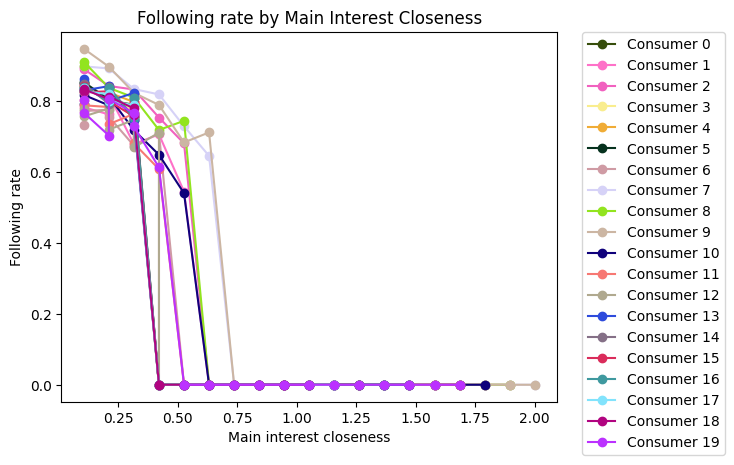

In [24]:
visualize.plot_following_rate_by_main_interest_closeness("Following rate by Main Interest Closeness", content_market.consumers, content_market.producers, agent_colors, stats.consumer_stats)

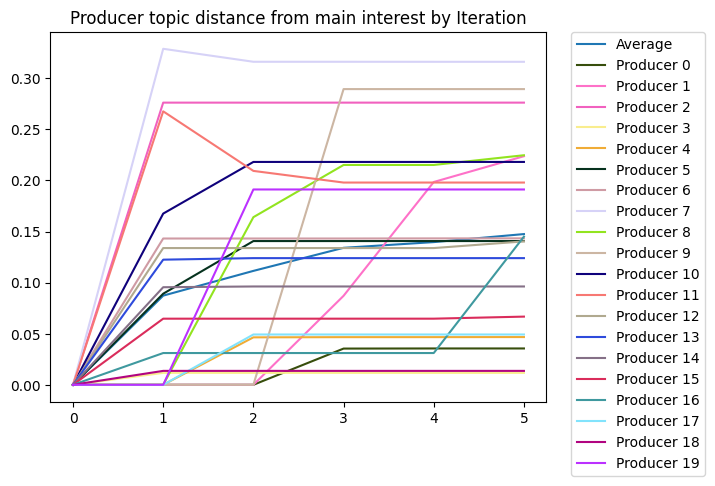

In [25]:
visualize.plot_producer_topic_distance_from_main_interest_by_iteration("Producer topic distance from main interest by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_distance_from_main_interest)

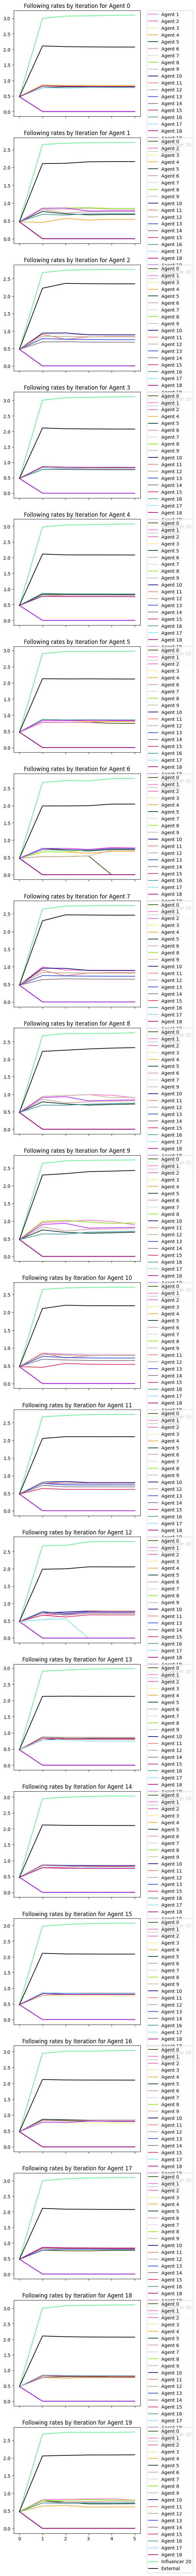

In [26]:
visualize.plot_following_rates_by_iteration(content_market.consumers, sorted(list(set(content_market.producers + content_market.influencers)), key=lambda x: x.index), agent_colors, stats.consumer_stats)

In [213]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

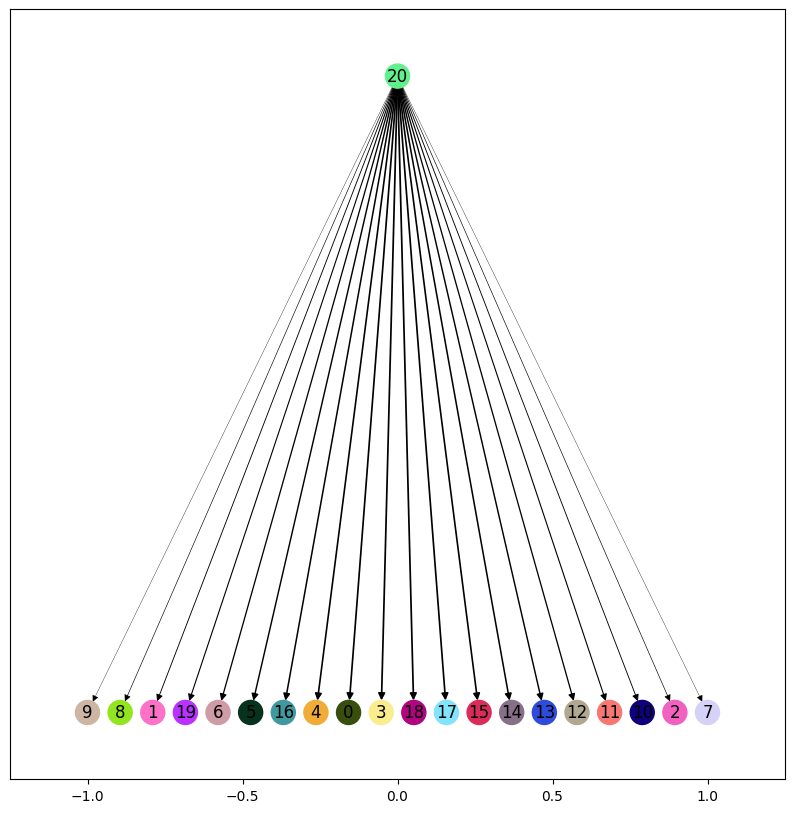

In [200]:
visualize.visualize_influencer(content_market, stats.influencer_stats[content_market.influencers[0].index], agent_colors)

{0: (-0.1578947368421053, 0), 1: (-0.7894736842105263, 0), 2: (0.894736842105263, 0), 3: (-0.052631578947368474, 0), 4: (-0.26315789473684215, 0), 5: (-0.4736842105263158, 0), 6: (-0.5789473684210527, 0), 7: (1.0, 0), 8: (-0.8947368421052632, 0), 9: (-1.0, 0), 10: (0.7894736842105261, 0), 11: (0.6842105263157894, 0), 12: (0.5789473684210527, 0), 13: (0.4736842105263157, 0), 14: (0.36842105263157876, 0), 15: (0.26315789473684204, 0), 16: (-0.368421052631579, 0), 17: (0.1578947368421053, 0), 18: (0.05263157894736836, 0), 19: (-0.6842105263157895, 0), 20: (0, 1), 'External': (1, 1)}
[0.2500000000000001, 0.25, 0.5151966276139007, 0.5179252554008511, 0.5029410278811249, 0.25000000000000017, 0.25, 0.2500000000000001, 0.25000000000000017, 0.2500000000000001, 0.25, 0.5088040198342776, 0.49551961939295847, 0.5069058706041991, 0.25000000000000006, 1.2447093673334977, 0.9154081430364035, 0.25000000000000006, 0.25000000000000006, 0.42452518500534425, 0.4674135387919519, 0.4942344401012725, 0.52188

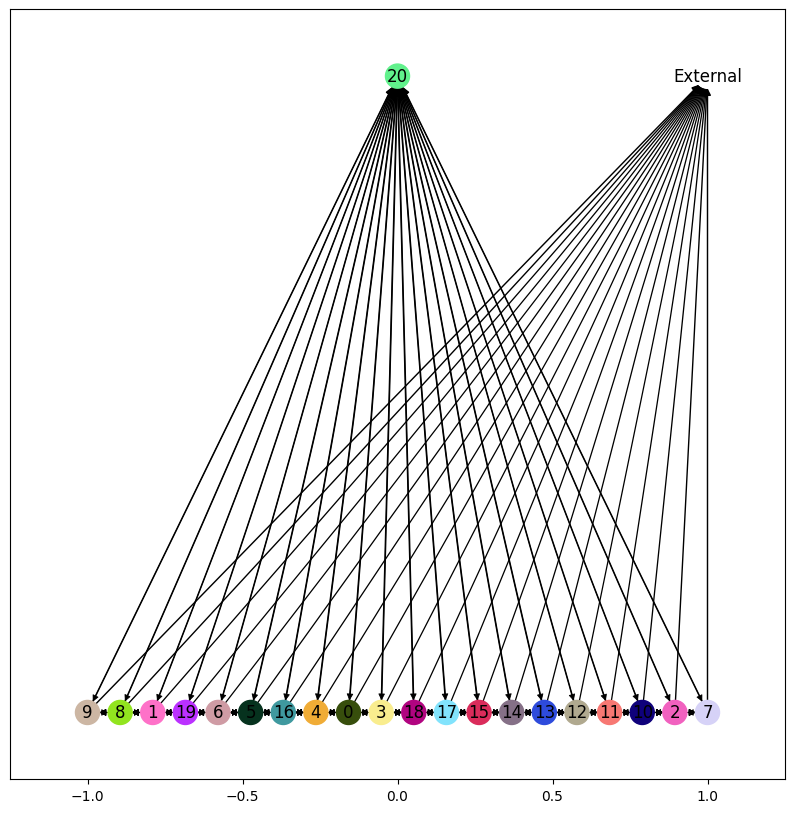

In [170]:
visualize.visualize_market(content_market, stats, agent_colors)

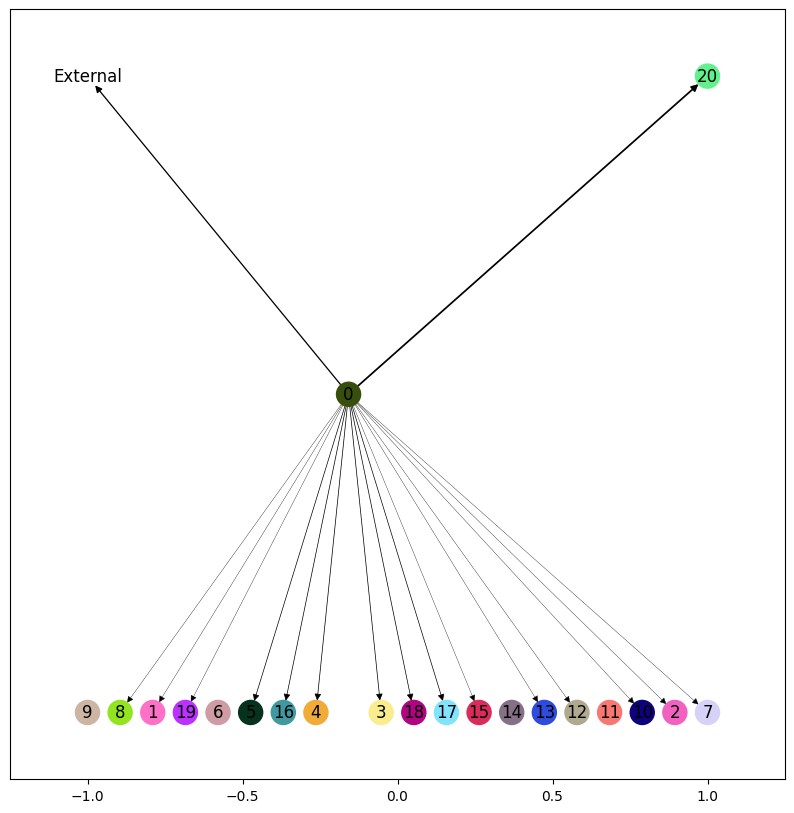

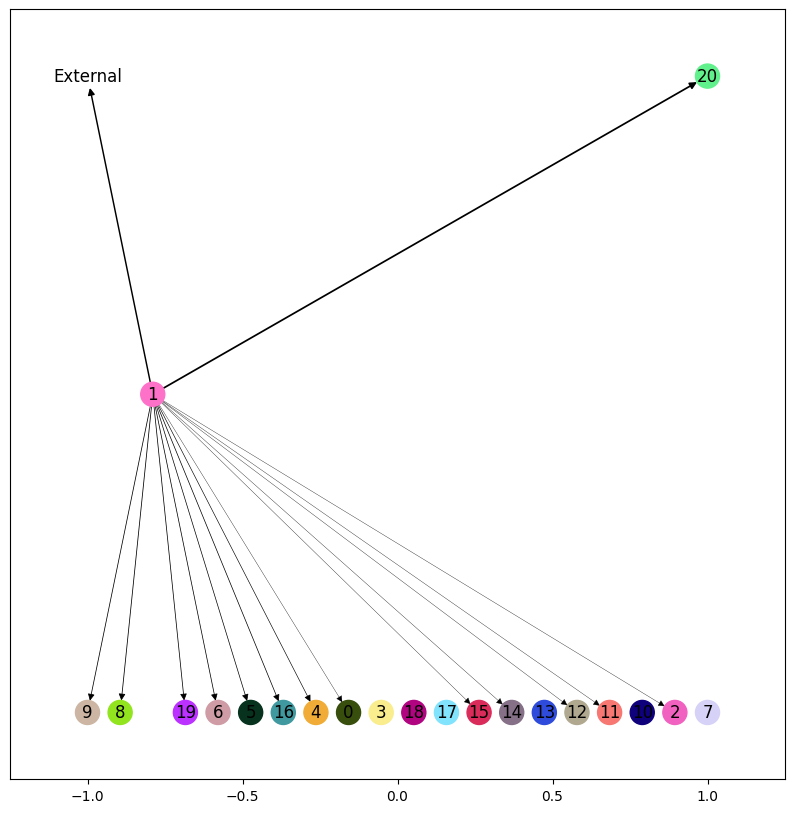

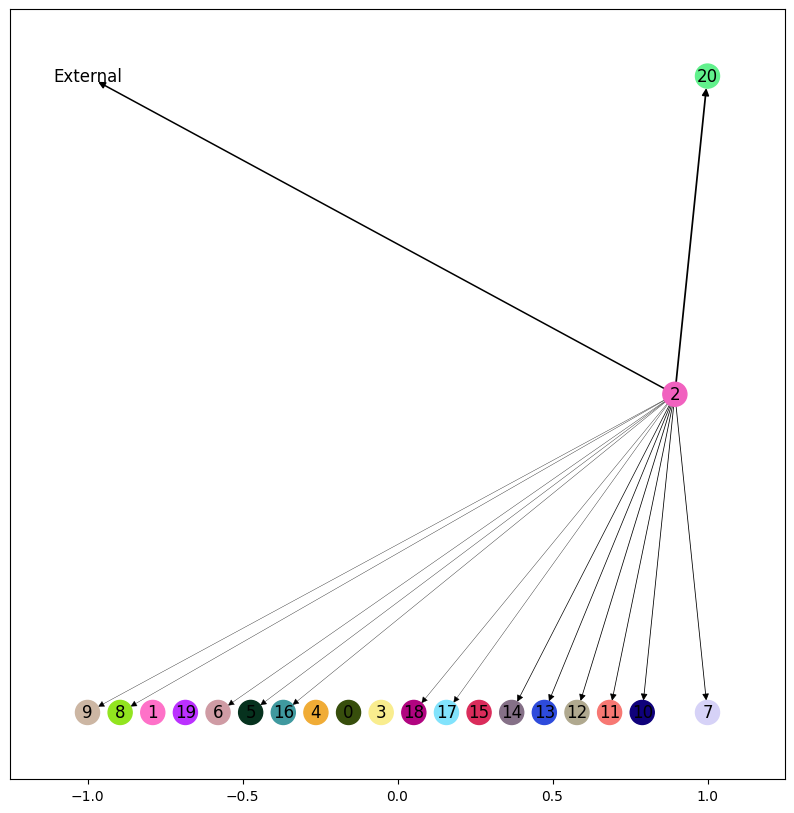

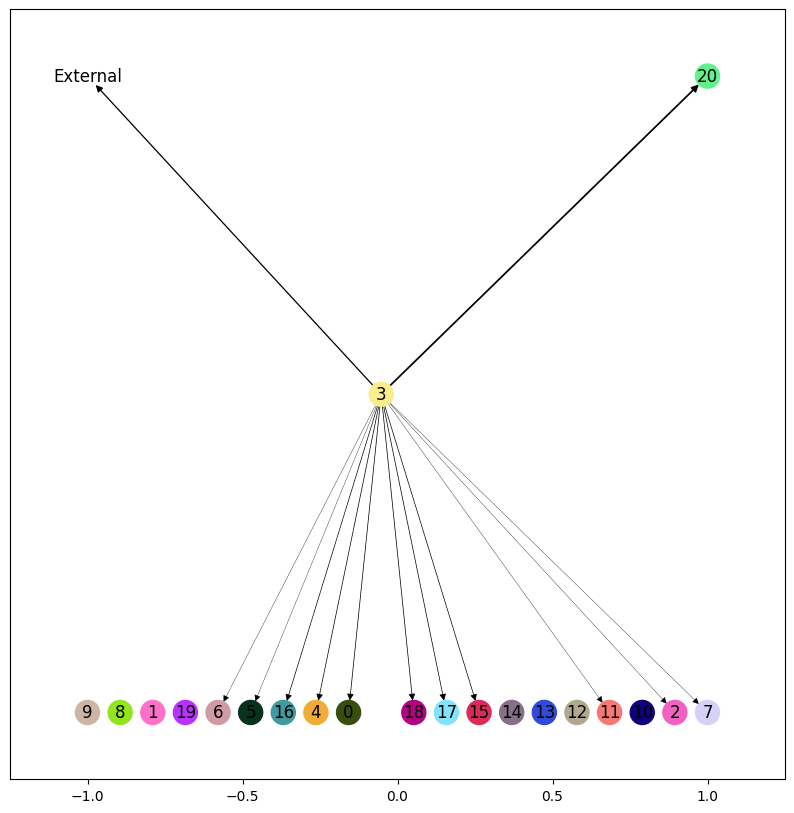

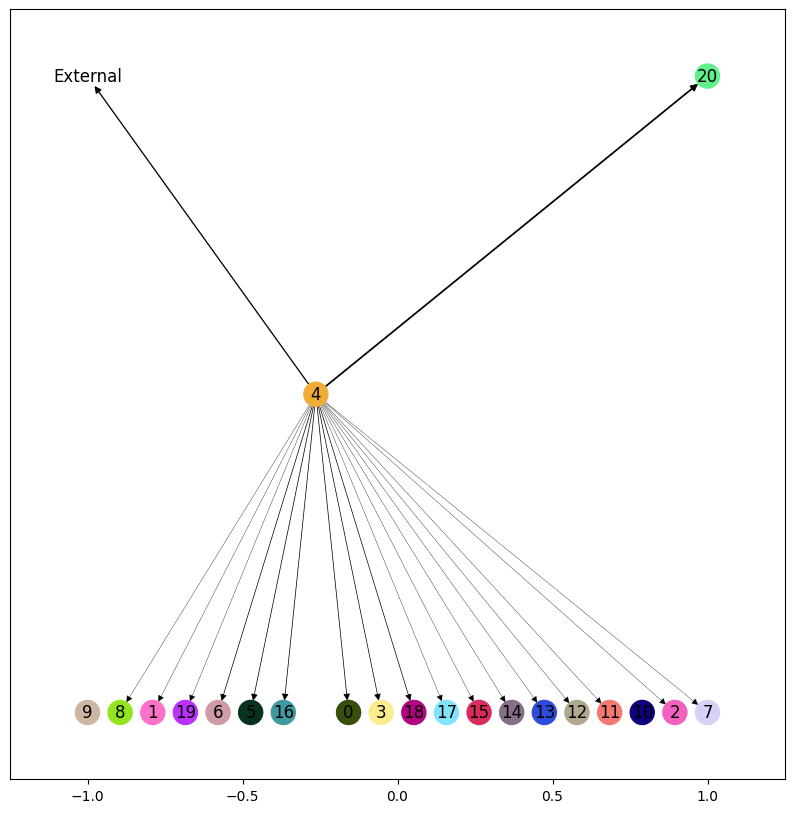

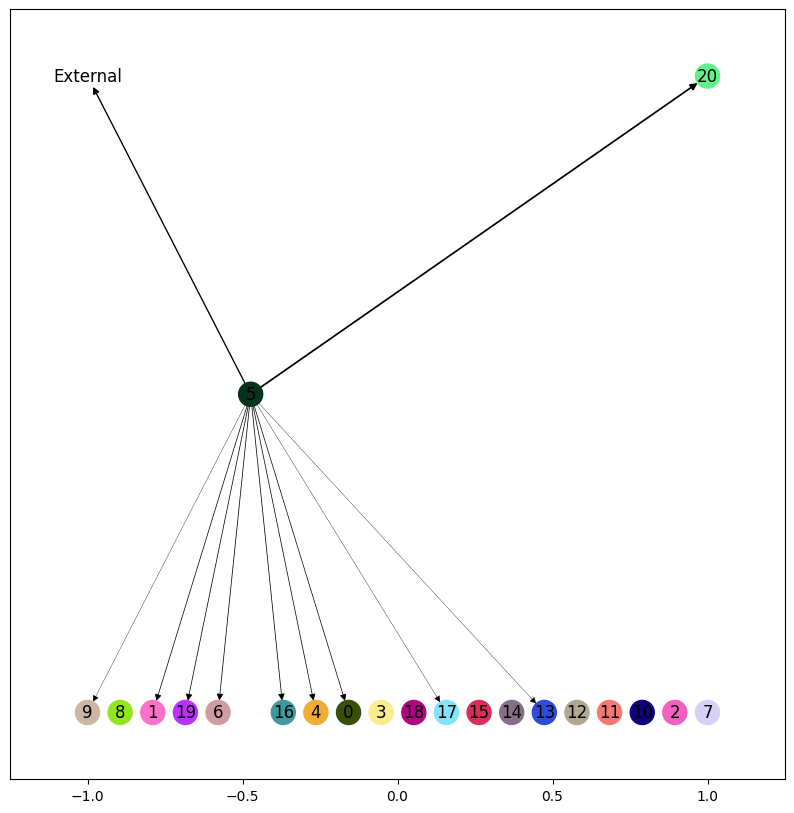

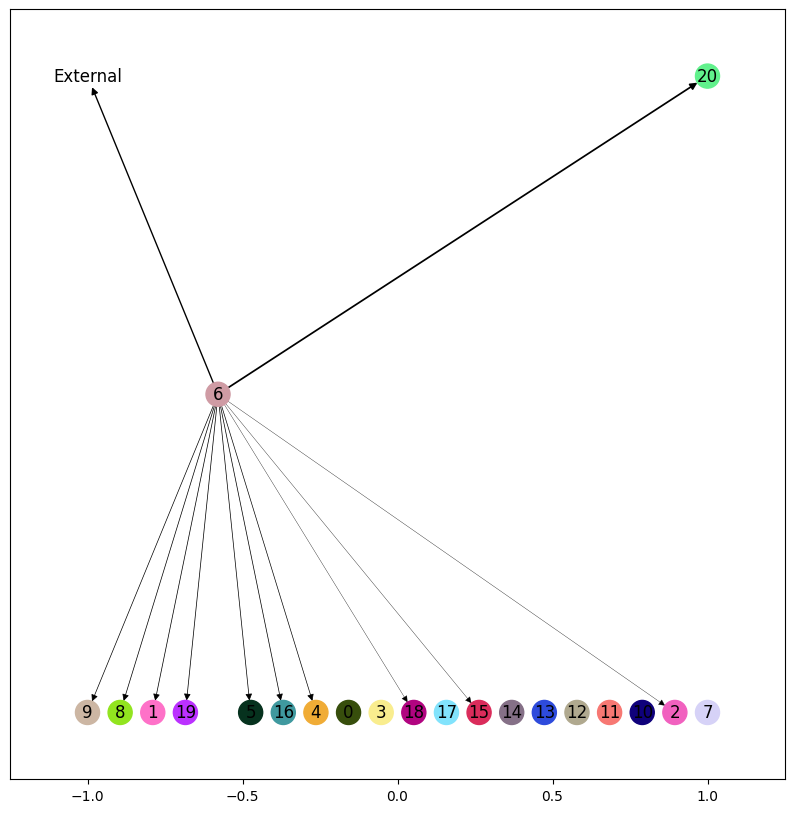

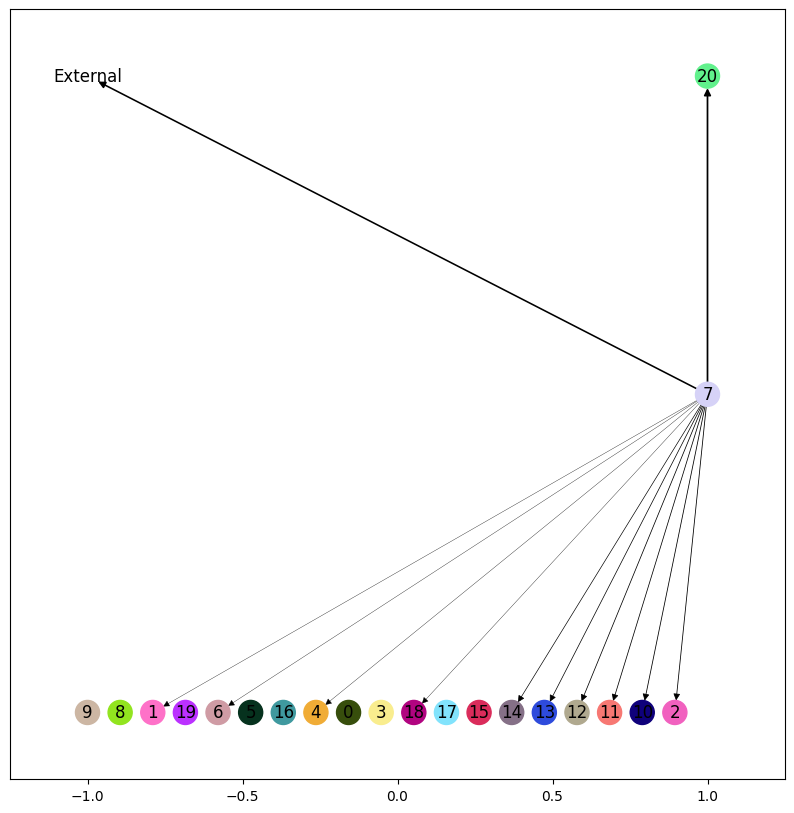

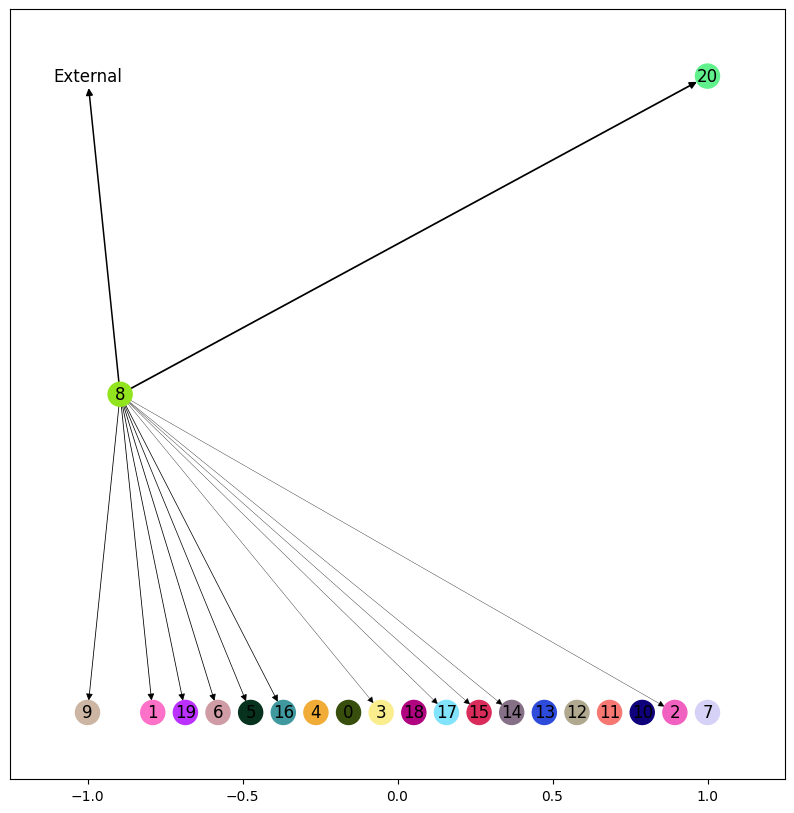

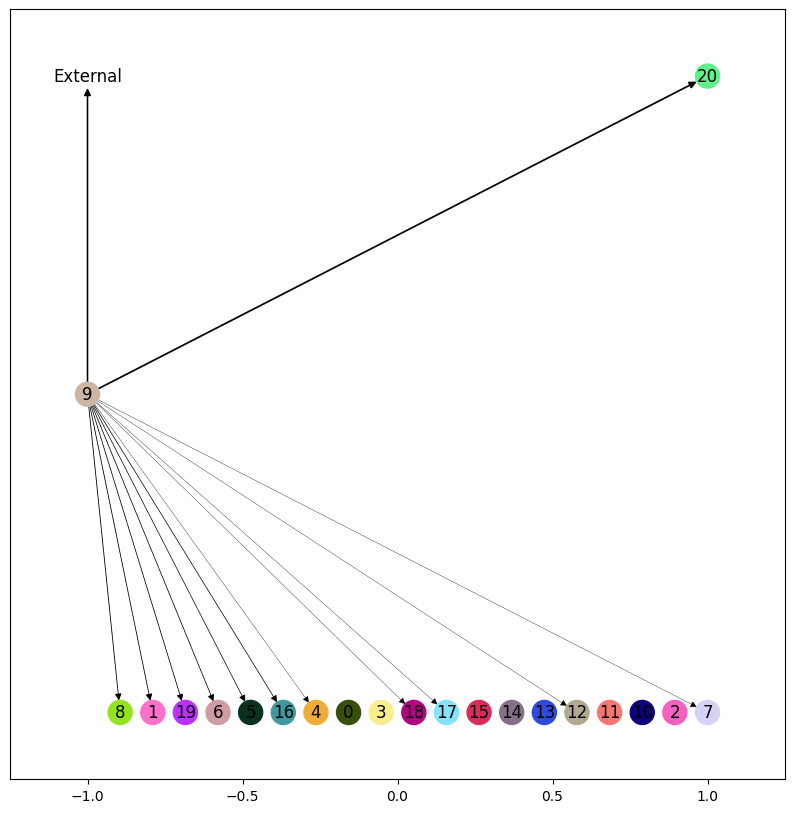

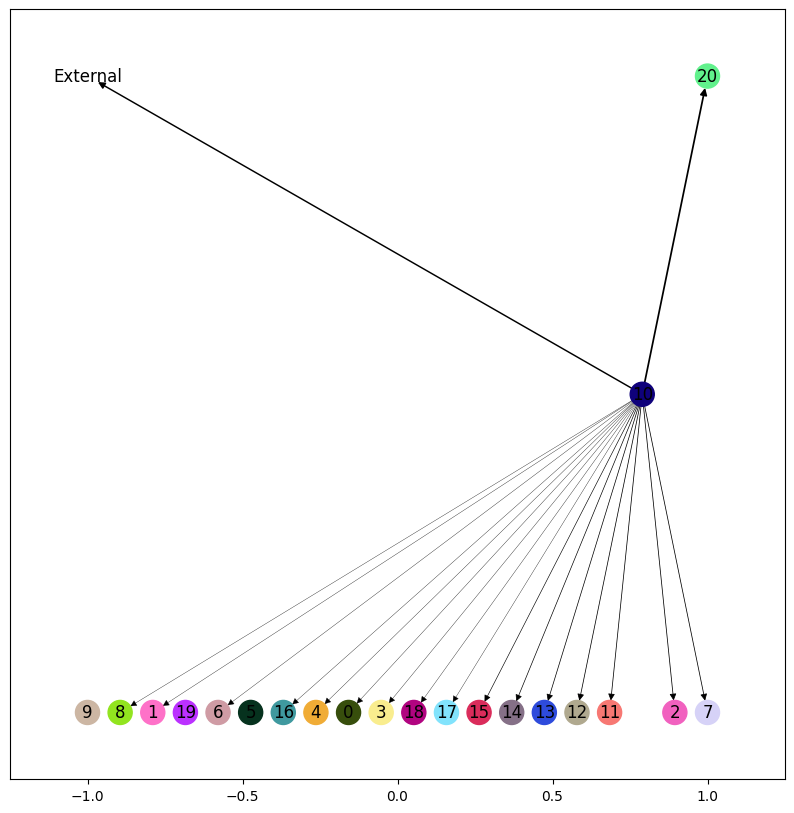

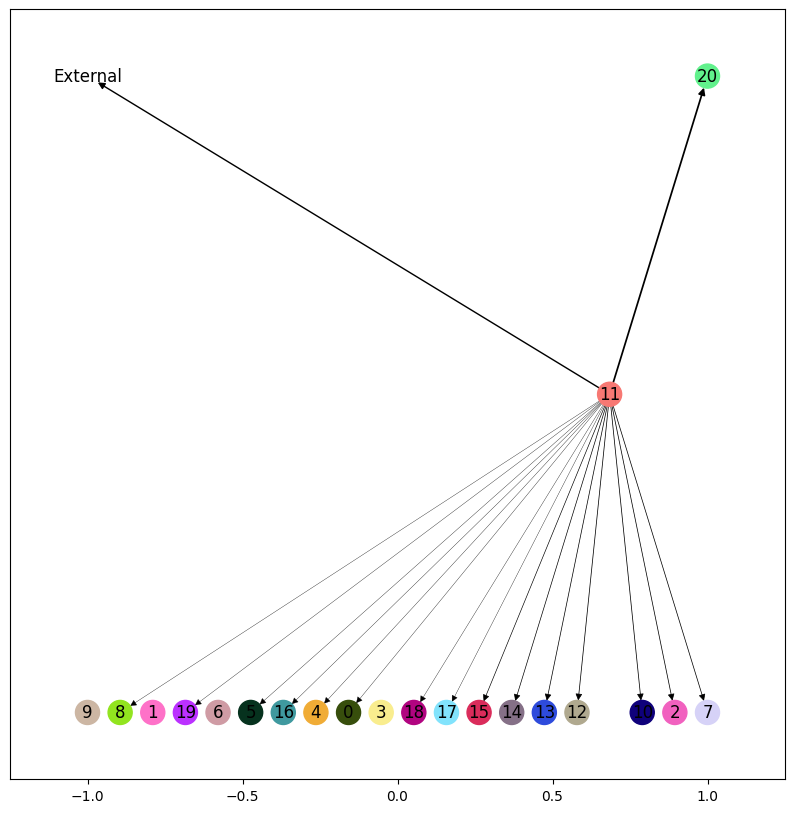

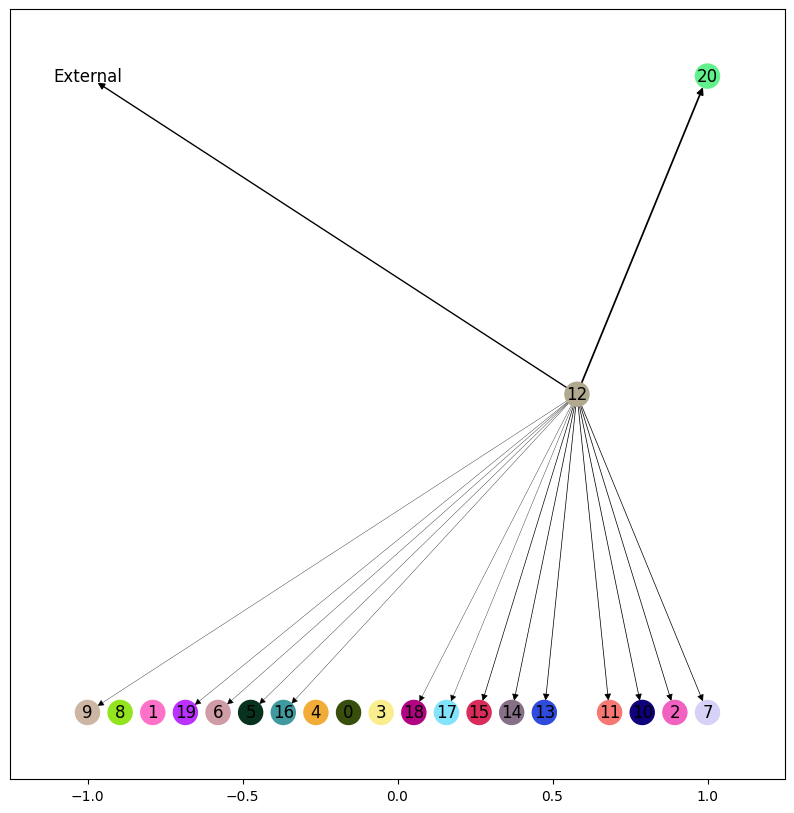

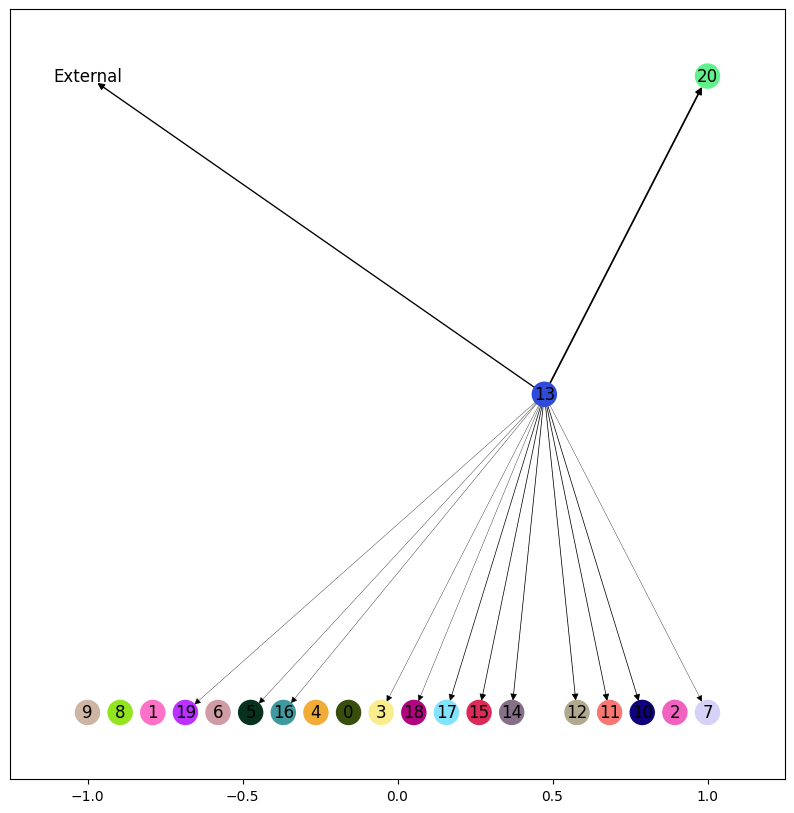

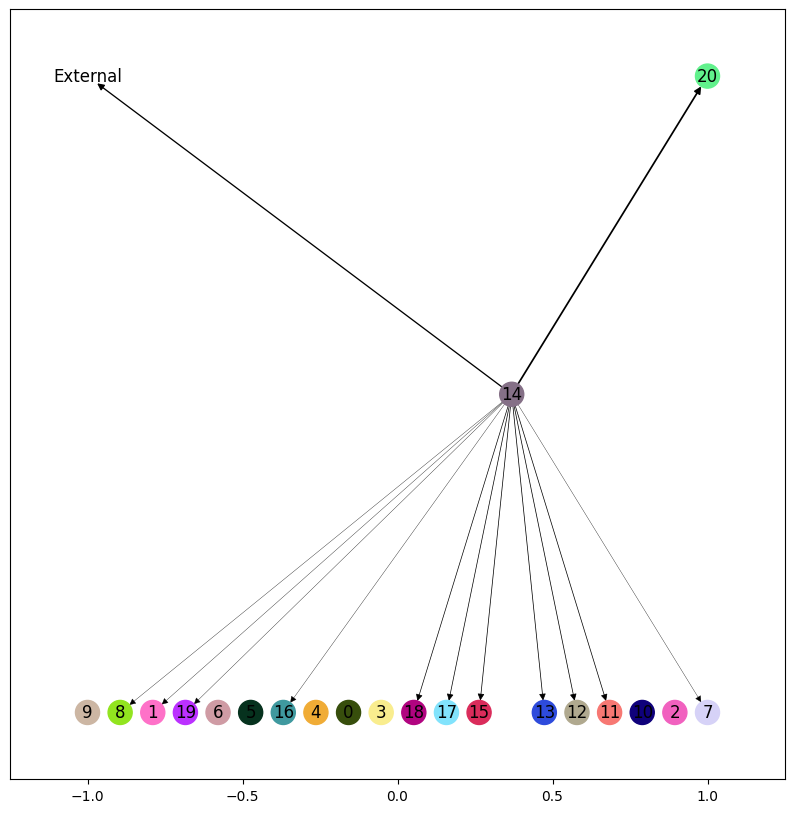

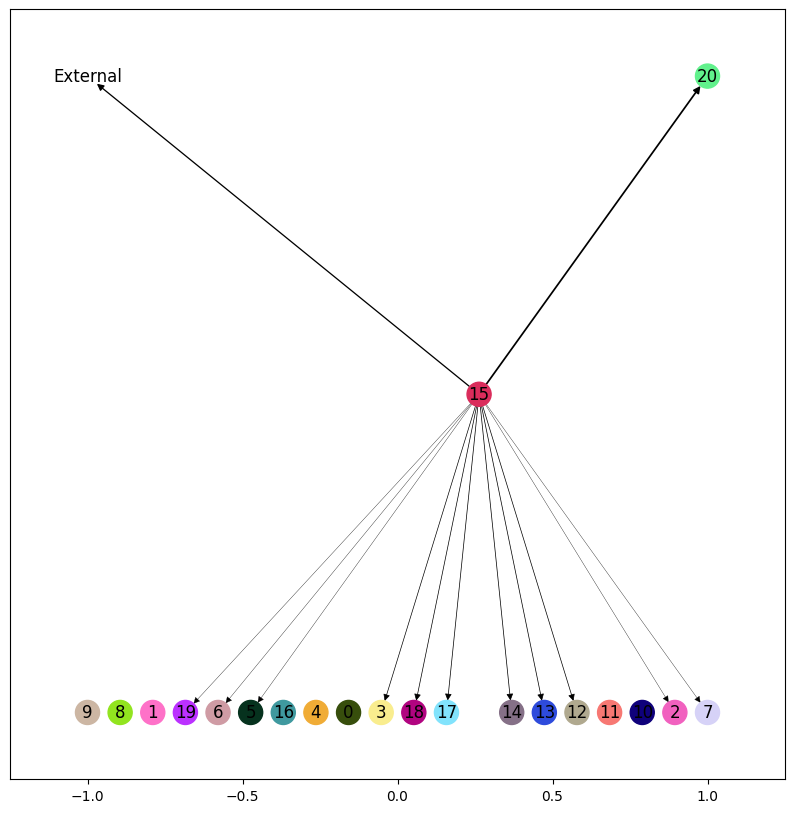

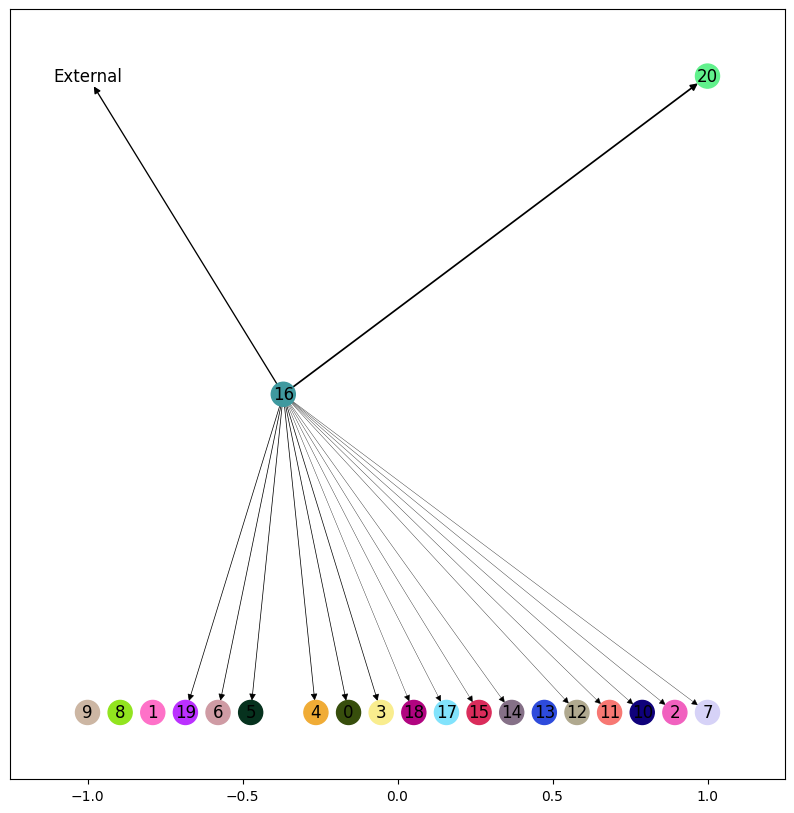

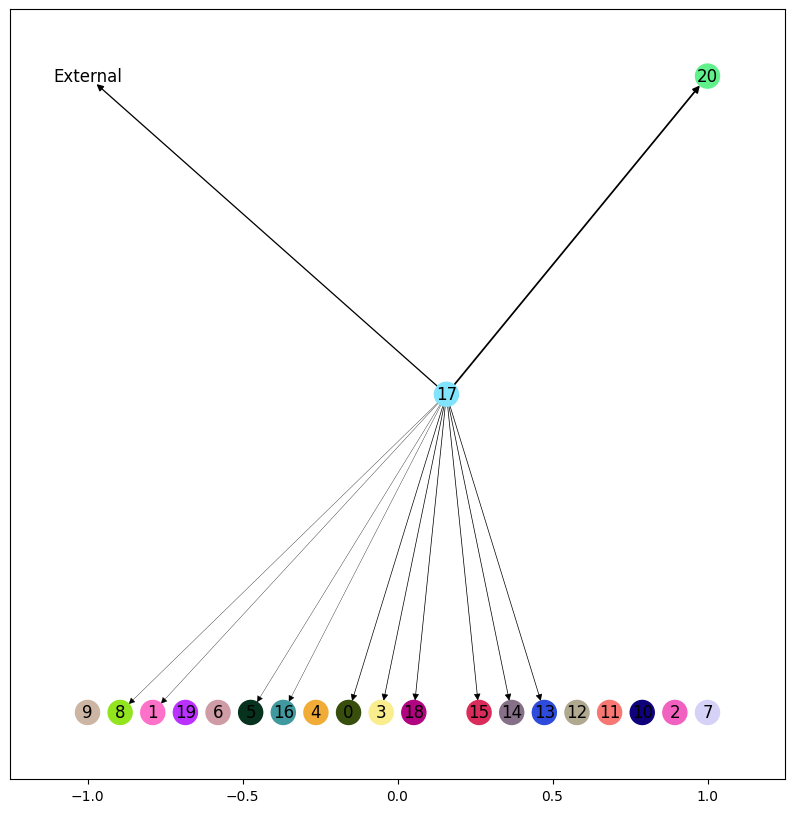

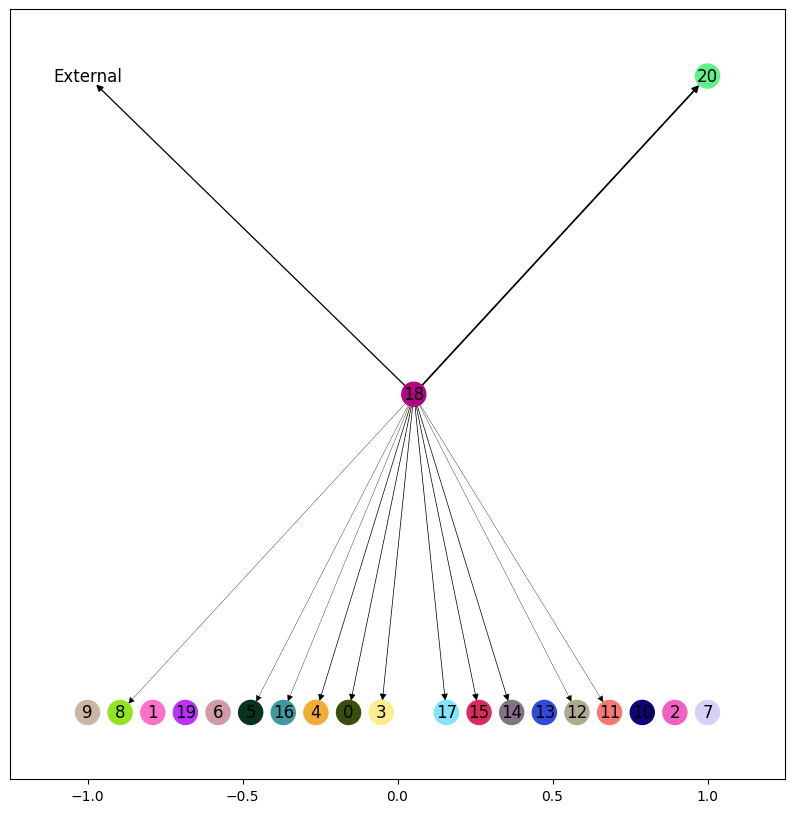

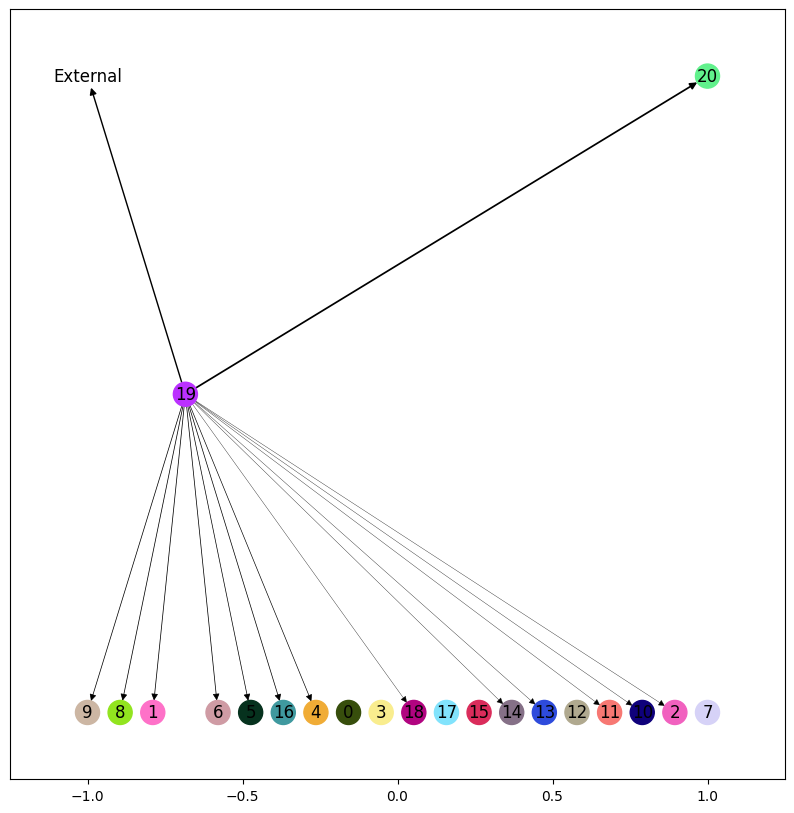

In [180]:
for consumer in content_market.consumers:
    visualize.visualize_consumer(content_market, stats.consumer_stats[consumer.index], agent_colors)

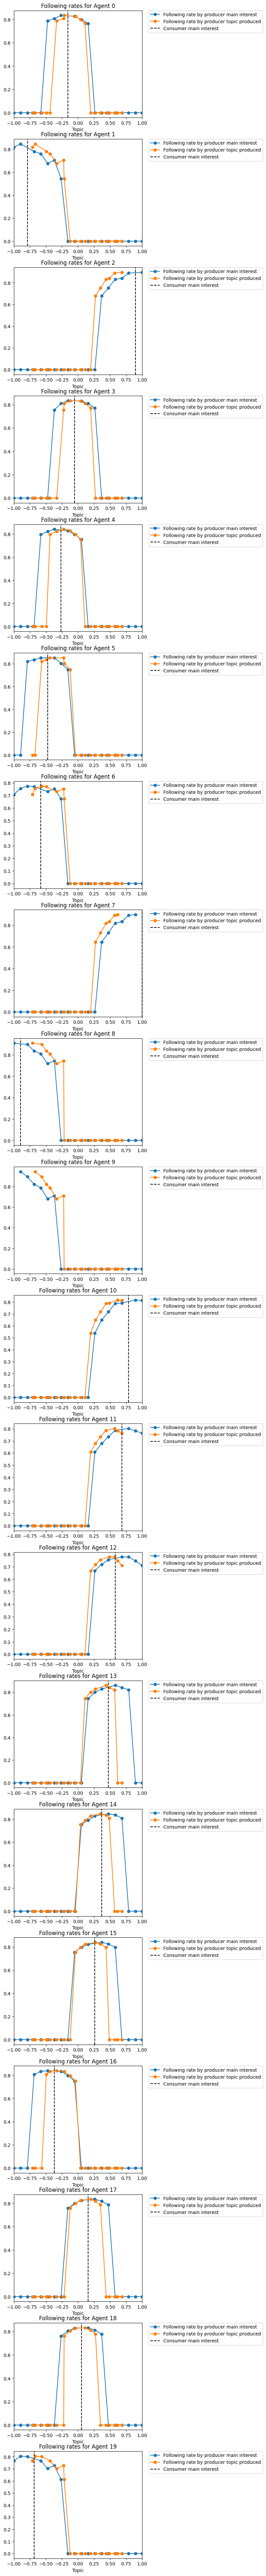

In [73]:
visualize.plot_agent_following_rates(content_market.consumers, stats.consumer_stats, agent_colors)

In [27]:
stats.to_dict()

{'num_iterations': 5,
 'total_consumer_utility': [0,
  137.95950858173515,
  138.23842398981787,
  138.66837668479297,
  138.8054440717549,
  138.66947615748913],
 'total_producer_utility': [0,
  7.316607321108899,
  7.320973199920949,
  7.33267750434379,
  7.333278503444613,
  7.333265945846459],
 'total_influencer_utility': [0,
  67.61904783705971,
  68.51818262326272,
  69.03433650276828,
  69.21960399449738,
  69.27010873426997],
 'total_social_welfare': [0,
  212.89516373990375,
  214.07757981300153,
  215.03539069190504,
  215.35832656969689,
  215.27285083760555],
 'average_consumer_rate_change': [0,
  3.4255760867015104,
  0.12109445078871554,
  0.09051747542135781,
  0.05361274430644739,
  0.014443332986323257],
 'average_producer_topic_change': [0,
  0.08728488972380063,
  0.031316017400768205,
  0.02373679634657948,
  0.005586614678599966,
  0.007869947093680432],
 'average_influencer_rate_change': [0,
  0.525497779432765,
  0.1398698831924203,
  0.08451345480028402,
  0.119

In [77]:
sorted([c.main_interest for c in content_market.consumers])

[array([-1.]),
 array([-0.89473684]),
 array([-0.78947368]),
 array([-0.68421053]),
 array([-0.57894737]),
 array([-0.47368421]),
 array([-0.36842105]),
 array([-0.26315789]),
 array([-0.15789474]),
 array([-0.05263158]),
 array([0.05263158]),
 array([0.15789474]),
 array([0.26315789]),
 array([0.36842105]),
 array([0.47368421]),
 array([0.57894737]),
 array([0.68421053]),
 array([0.78947368]),
 array([0.89473684]),
 array([1.])]